## Documentation

Building a trend-following trading algorithm using machine learning involves several steps. Here's a general framework to guide you through the process:

1. Data Collection: Gather historical price data for the assets you want to trade. Ensure the data includes relevant features like open, high, low, and closing prices, as well as any additional indicators you may want to use.

2. Data Preprocessing: Prepare the data for training by cleaning, normalizing, and transforming it into a suitable format. Split the dataset into training and testing sets to evaluate model performance.

3. Feature Engineering: Enhance the dataset by creating additional features derived from the existing ones. For trend-following strategies, you might consider indicators like moving averages, MACD, RSI, or Bollinger Bands. Experiment with various indicators to identify those that work best for your specific trading strategy.

4. Labeling: Assign labels to your dataset to indicate whether a particular period represents an uptrend, downtrend, or a neutral phase. This step is crucial for training a supervised machine learning model.

5. Model Selection: Choose an appropriate machine learning model that can capture the underlying patterns in your data and make predictions. Several models can be suitable for trend following, including logistic regression, support vector machines (SVM), random forests, gradient boosting machines (GBM), or even deep learning models like recurrent neural networks (RNNs).

6. Training: Feed your labeled dataset into the chosen model and train it on historical data. Adjust hyperparameters and evaluate the model's performance using appropriate evaluation metrics like accuracy, precision, recall, or the area under the receiver operating characteristic (ROC) curve.

7. Testing and Validation: Assess the model's performance on unseen data by testing it on your validation set. Monitor key performance metrics and ensure the model's predictive ability translates to real-time data.

8. Backtesting: Implement your trained model into a trading strategy and simulate its performance on historical data to evaluate its profitability. This step allows you to assess whether the model can generate meaningful trading signals.

9. Risk Management: Incorporate risk management techniques to mitigate potential losses. Implement stop-loss orders, position sizing, or portfolio diversification strategies to control risk exposure.

10. Live Trading: Deploy your algorithm in a live trading environment with appropriate safeguards. Continuously monitor its performance and refine the model as needed based on real-time results.

Remember that successful trading algorithms require continuous monitoring, adjustment, and adaptation. Market conditions and dynamics can change, necessitating regular updates to the model and strategy. Additionally, risk management and thorough validation are crucial to ensure the algorithm's effectiveness in real-world trading scenarios.

In [175]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [141]:


# Step 1: Data Collection
# Assuming you have a CSV file with historical price data, load it into a pandas DataFrame
df = yf.download("^NSEI",start="2021-06-12",end="2023-06-18")

[*********************100%***********************]  1 of 1 completed


In [160]:
def preprocess_data(df):
    df.dropna(inplace=True)
    df['Date2'] = df.index
    df.reset_index(inplace=True)
    df.Date = df.Date2
    df.drop(["Date2"],inplace=True,axis=1)

        # sore the values in ascending order 
    df.sort_values('Date',inplace = True)

    # Normalize the price data using Min-Max scaling
    scaler = MinMaxScaler()
    df['Normalized Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

    # Normalize the price data using Min-Max scaling
    scaler = MinMaxScaler()
    df['Normalized Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

    # Compute additional technical indicators if needed
    # For example, you can calculate the simple moving average (SMA)
    sma_window = 20
    df['SMA'] = df['Close'].rolling(window=sma_window).mean()

    # Compute other technical indicators as required

    # Define target variable
    lookback_period = 5  # Adjust as needed
    df['Target'] = df['Close'].shift(-lookback_period)
    df['Target'] = np.where(df['Target'] > df['Close'], 1, -1)

    # Compute additional features using talib indicators
    df['SMA'] = talib.SMA(df['Close'], timeperiod=20)
    df['EMA'] = talib.EMA(df['Close'], timeperiod=20)
    df['MACD'], _, _ = talib.MACD(df['Close'])
    df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
    df['ADX'] = talib.ADX(df['High'], df['Low'], df['Close'], timeperiod=14)
    df['Stoch_K'], df['Stoch_D'] = talib.STOCH(df['High'], df['Low'], df['Close'])
    
        # Define a threshold for labeling
    threshold = 0.02  # Adjust as needed

    # Assign labels based on the percentage change in price
    df['label'] = 0  # Initialize all labels as 0 (neutral)

    df.loc[df['Close'].pct_change() > threshold, 'label'] = 1  # Assign 1 for uptrend
    df.loc[df['Close'].pct_change() < -threshold, 'label'] = -1  # Assign -1 for downtrend
    
    return df

In [167]:
df = yf.download("^NSEI",start="2010-08-12",end="2012-06-18")
prepared_data=preprocess_data(df)
prepared_data['Date'] = prepared_data['Date'].astype(int)
prepared_data.dropna(inplace=True)

X = df.drop('label', axis=1)  # Features
y = df['label']  # Labels
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy}")

[*********************100%***********************]  1 of 1 completed
Accuracy: 0.8902147971360382


(array([ 20.,   0.,   0.,   0.,   0., 373.,   0.,   0.,   0.,  26.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

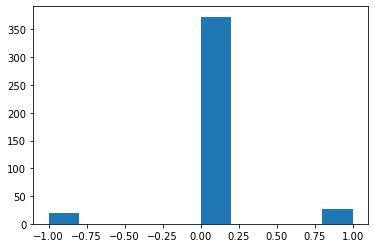

In [178]:
plt.hist(df.label)

In [154]:
type(prepared_data)

NoneType

In [144]:
# Step 1: Data Collection
# Assuming you have a CSV file with historical price data, load it into a pandas DataFrame
df = yf.download("^NSEI",start="2021-06-12",end="2023-06-18")

# Step 2: Data Preprocessing
# Clean, normalize, and transform the data as needed
df.dropna(inplace=True)



df['Date2'] = df.index
df.reset_index(inplace=True)
df.Date = df.Date2
df.drop(["Date2"],inplace=True,axis=1)



# sore the values in ascending order 
df.sort_values('Date',inplace = True)

# Normalize the price data using Min-Max scaling
scaler = MinMaxScaler()
df['Normalized Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Normalize the price data using Min-Max scaling
scaler = MinMaxScaler()
df['Normalized Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Compute additional technical indicators if needed
# For example, you can calculate the simple moving average (SMA)
sma_window = 20
df['SMA'] = df['Close'].rolling(window=sma_window).mean()

# Compute other technical indicators as required

# Define target variable
lookback_period = 5  # Adjust as needed
df['Target'] = df['Close'].shift(-lookback_period)
df['Target'] = np.where(df['Target'] > df['Close'], 1, -1)

# Compute additional features using talib indicators
df['SMA'] = talib.SMA(df['Close'], timeperiod=20)
df['EMA'] = talib.EMA(df['Close'], timeperiod=20)
df['MACD'], _, _ = talib.MACD(df['Close'])
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
df['ADX'] = talib.ADX(df['High'], df['Low'], df['Close'], timeperiod=14)
df['Stoch_K'], df['Stoch_D'] = talib.STOCH(df['High'], df['Low'], df['Close'])


# Step 4: Labeling
# Assign labels (e.g., 1 for uptrend, -1 for downtrend, 0 for neutral)

# Define a threshold for labeling
threshold = 0.02  # Adjust as needed

# Assign labels based on the percentage change in price
df['label'] = 0  # Initialize all labels as 0 (neutral)

df.loc[df['Close'].pct_change() > threshold, 'label'] = 1  # Assign 1 for uptrend
df.loc[df['Close'].pct_change() < -threshold, 'label'] = -1  # Assign -1 for downtrend


df.dropna(inplace=True)
X = df.drop('label', axis=1)  # Features
y = df['label']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Assuming you have a preprocessed DataFrame named 'df' with relevant columns

# Convert the datetime column to a numerical representation
df['Date'] = df['Date'].astype(int)

# Split the dataset into features (X) and labels (y)
X = df.drop('label', axis=1)  # Features
y = df['label']  # Labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection and Training
model = RandomForestClassifier()  # You can try other models as well
model.fit(X_train, y_train)

# Continue with further steps of your trading model


[*********************100%***********************]  1 of 1 completed


RandomForestClassifier()

In [146]:
# Step 7: Testing and Validation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9680851063829787


In [ ]:
# Step 9: Risk Management
# Incorporate risk management techniques into your strategy


In [ ]:
# Step 10: Live Trading
# Deploy your algorithm in a live trading environment with appropriate safeguards


# Trend Resversal Strategy

In [196]:
!pip install ta


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29104 sha256=3d3a3f214d0bf1406e22fa3e2465c626844e191a3f2016bee83705f818d10959
  Stored in directory: /home/dhruv/.cache/pip/wheels/47/51/06/380dc516ea78621870b93ff65527c251afdfdc5fa9d7f4d248
Successfully built ta


In [197]:
import yfinance as yf
import pandas as pd
from ta import add_all_ta_features


In [198]:
def preprocess_data(ticker, start_date, end_date):
    # Collect historical stock data
    data = yf.download(ticker, start=start_date, end=end_date, progress=False)
    
    # Preprocess data
    data = data.dropna()  # Remove rows with missing values
    
    # Add technical indicators
    data = add_all_ta_features(
        data, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True
    )
    
    return data


In [199]:
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2022-12-31"

data = preprocess_data(ticker, start_date, end_date)


/home/dhruv/.local/lib/python3.10/site-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/home/dhruv/.local/lib/python3.10/site-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [200]:
data

,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.434280,104487900,6.932133e+07,104487900,0.663439,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,182.009995,17.550892,0.000000,0.000000
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.144287,99310400,1.680499e+05,5177500,0.000825,-2.294068e+08,...,-0.101339,-0.020268,-0.081071,-0.396736,-0.079347,-0.317389,181.209953,-1.269160,-1.277282,-1.269160
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.405685,94537600,-8.479616e+07,-89360100,-0.284230,-2.611900e+08,...,-0.390378,-0.094290,-0.296088,-1.076099,-0.278698,-0.797401,179.648492,-2.659988,-2.696006,-3.895388
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.510956,96904000,-1.626371e+08,-186264100,-0.411489,-2.643000e+08,...,-0.743453,-0.224122,-0.519331,-1.417991,-0.506556,-0.911435,178.305849,-1.669334,-1.683424,-5.499695
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.679474,86709100,-1.857781e+08,-99555000,-0.385473,-2.244371e+08,...,-1.006424,-0.380583,-0.625841,-2.484977,-0.902240,-1.582736,177.058930,0.098836,0.098787,-5.406295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.477127,63814900,8.255274e+08,-1297291800,-0.108259,-7.967960e+07,...,-2.613749,-1.812204,-0.801545,0.675589,1.688666,-1.013077,138.133261,-0.279812,-0.280204,-27.553429
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.652435,69007800,8.237314e+08,-1366299600,-0.088819,-8.633743e+07,...,-2.818298,-2.013423,-0.804875,-0.714236,1.208085,-1.922322,136.508708,-1.387837,-1.397557,-28.558869
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.674026,85438400,7.439226e+08,-1451738000,-0.105154,-1.227034e+08,...,-3.186055,-2.247949,-0.938105,-0.186269,0.929215,-1.115484,133.686346,-3.068521,-3.116586,-30.751055


In [202]:
def generate_labels(data, horizon, buy_threshold, sell_threshold):
    data['target'] = 'hold'  # Initialize target column with 'hold'
    
    for i in range(len(data) - horizon):
        current_price = data['Close'].iloc[i]
        future_price = data['Close'].iloc[i + horizon]
        
        if future_price >= current_price * (1 + buy_threshold):
            data.loc[data.index[i], 'target'] = 'buy'
        elif future_price <= current_price * (1 - sell_threshold):
            data.loc[data.index[i], 'target'] = 'sell'
    
    return data


In [203]:
horizon = 5  # Number of days in the future to predict
buy_threshold = 0.02  # Buy threshold of 2%
sell_threshold = 0.02  # Sell threshold of 2%

data = generate_labels(data, horizon, buy_threshold, sell_threshold)


In [204]:
train_size = int(0.8 * len(data))  # 80% of the data for training

train_data = data[:train_size]
test_data = data[train_size:]


In [208]:
train_data

,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,target
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.434280,104487900,6.932133e+07,104487900,0.663439,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,182.009995,17.550892,0.000000,0.000000,sell
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.144287,99310400,1.680499e+05,5177500,0.000825,-2.294068e+08,...,-0.020268,-0.081071,-0.396736,-0.079347,-0.317389,181.209953,-1.269160,-1.277282,-1.269160,sell
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.405685,94537600,-8.479616e+07,-89360100,-0.284230,-2.611900e+08,...,-0.094290,-0.296088,-1.076099,-0.278698,-0.797401,179.648492,-2.659988,-2.696006,-3.895388,hold
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.510956,96904000,-1.626371e+08,-186264100,-0.411489,-2.643000e+08,...,-0.224122,-0.519331,-1.417991,-0.506556,-0.911435,178.305849,-1.669334,-1.683424,-5.499695,hold
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.679474,86709100,-1.857781e+08,-99555000,-0.385473,-2.244371e+08,...,-0.380583,-0.625841,-2.484977,-0.902240,-1.582736,177.058930,0.098836,0.098787,-5.406295,hold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-12,139.130005,140.360001,138.160004,138.339996,137.709854,70433700,7.363603e+08,-989546500,0.000022,-9.404578e+07,...,-2.754012,-0.430630,-3.332599,2.297310,-5.629908,147.232014,-0.460497,-0.461561,-23.993187,buy
2022-10-13,134.990005,143.589996,134.369995,142.990005,142.338699,113224000,8.348482e+08,-876322500,0.071843,-5.397436e+06,...,-2.799504,-0.181965,-0.738315,1.690185,-2.428499,147.207256,3.361291,3.306034,-21.438377,hold
2022-10-14,144.309998,144.520004,138.190002,138.380005,137.749680,88598000,7.515689e+08,-964920500,-0.016829,-6.297449e+07,...,-2.848607,-0.196415,-0.892254,1.173697,-2.065951,147.165647,-3.224002,-3.277118,-23.971205,buy


In [205]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [206]:
def train_and_evaluate_model(train_data, test_data, features):
    X_train = train_data[features]
    y_train = train_data['target']
    
    X_test = test_data[features]
    y_test = test_data['target']
    
    # Initialize and train the model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    return model, accuracy, precision, recall


In [209]:
selected_features = ['momentum_rsi', 'trend_macd', 'volatility_bbm']
model, accuracy, precision, recall = train_and_evaluate_model(train_data, test_data, selected_features)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.17647058823529413
Precision: 0.03114186851211073
Recall: 0.17647058823529413


/home/dhruv/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
